## Task D: V1's simple cell model (tuned to vertical orientation)

### Load the image

I_2d.shape:  (512, 512)


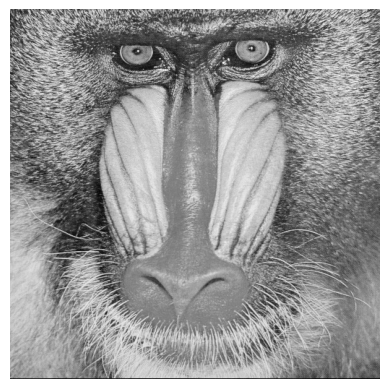

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np  
import os

figures_dir = image_path = os.path.join("..", "figures")

image_path = os.path.join(figures_dir, "baboon.jpg")
I = Image.open(image_path).convert('L')  # 'L' means the gray scale

I_2d = np.array(I)
print("I_2d.shape: ", I_2d.shape)

plt.imshow(I_2d, cmap='gray')  # show the image
plt.axis('off')     # turn down the axis
plt.show()


### Function definition

In [2]:
import numpy as np

def norm_matrix(M):
    '''Normalize the matrix to [-1, 1]'''
    M_min = np.min(M)
    M_max = np.max(M)
    return 2 * (M - M_min) / (M_max - M_min) - 1

### 1.1 How $K(x,y)$ change with each parameters

$$K(x, y) = \exp{\left( -\frac{x^2}{2\sigma_x^2} - \frac{y^2}{2\sigma_y^2} \right)} \cos(\hat{k}x + \phi)$$

In [3]:
from math import exp, cos, pi

def K(x,y,sigma_x,sigma_y,k_hat,phi):
    '''Gaussian kernel function (V1)'''
    x = x/2
    y = y/2
    # return cos(k_hat*x + phi)
    return exp(-(x**2/(2*sigma_x**2) + y**2/(2*sigma_y**2))) * cos(k_hat*x + phi)

def get_kernel_V1(sigma_x,sigma_y,k_hat,phi,size=None):
    ''' (Discrete matrix)'''
    if size is None:
        size = np.int32(16 * max(sigma_x, sigma_y))   # size of the kernel, cover [-3sigma, 3sigma]
    M = np.zeros((size, size))
    for i in range(size):
        y = i - size/2  # line index -> y-axis
        for j in range(size):
            x = j - size/2  # column index -> x-axis
            M[i,j] += K(x,y,sigma_x,sigma_y,k_hat,phi)
    return M

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\h'
<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\h'
<>:10: SyntaxWarning: invalid escape sequence '\p'
/var/folders/ty/jw9csq0j64j3_w_b8kmz3b2h0000gn/T/ipykernel_7750/4102429823.py:10: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f"V1 kernel (vertical)\n($\sigma_x$ ={sigma_x}, $\sigma_y$ = {sigma_y}, $\hat k$= {k_hat:.3f}, $\phi$={phi:.3f})")
/var/folders/ty/jw9csq0j64j3_w_b8kmz3b2h0000gn/T/ipykernel_7750/4102429823.py:10: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f"V1 kernel (vertical)\n($\sigma_x$ ={sigma_x}, $\sigma_y$ = {sigma_y}, $\hat k$= {k_hat:.3f}, $\phi$={phi:.3f})")
/var/folders/ty/jw9csq0j64j3_w_b8kmz3b2h0000gn/T/ipykernel_7750/4102429823.py:10: Synt

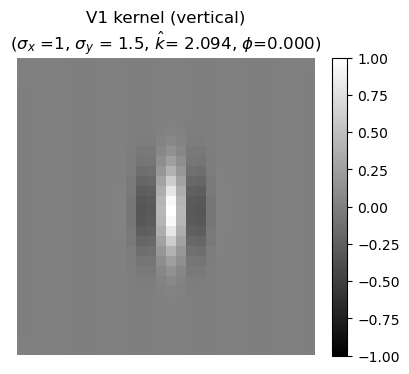

In [30]:
sigma_x,sigma_y,k_hat,phi = 1, 1.5, 2/3*pi, 0
kernel = get_kernel_V1(sigma_x,sigma_y,k_hat,phi,size=30)

plt.figure(figsize=(10, 4))


# 红蓝双极伪彩色（正值为兴奋，负值为抑制）
plt.subplot(1, 2, 2)
plt.imshow(kernel, cmap='gray', vmax=1, vmin=-1)
plt.title(f"V1 kernel (vertical)\n($\sigma_x$ ={sigma_x}, $\sigma_y$ = {sigma_y}, $\hat k$= {k_hat:.3f}, $\phi$={phi:.3f})")
plt.colorbar(fraction=0.046, pad=0.04)

plt.tight_layout()
plt.axis('off')
plt.savefig(os.path.join(figures_dir, f"V1_kernel_sx{sigma_x}_sy{sigma_y}_khat{k_hat:.3f}_phi{phi:.3f}.pdf"), bbox_inches='tight', pad_inches=0.1)
plt.show()

### 1.2 Compute the responses of the whole picture

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\h'
<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\h'
<>:14: SyntaxWarning: invalid escape sequence '\p'
/var/folders/ty/jw9csq0j64j3_w_b8kmz3b2h0000gn/T/ipykernel_8566/2604984148.py:14: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f"Response map\n($\sigma_x$ ={sigma_x}, $\sigma_y$ = {sigma_y}, $\hat k$= {k_hat:.3f}, $\phi$={phi:.3f})")
/var/folders/ty/jw9csq0j64j3_w_b8kmz3b2h0000gn/T/ipykernel_8566/2604984148.py:14: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f"Response map\n($\sigma_x$ ={sigma_x}, $\sigma_y$ = {sigma_y}, $\hat k$= {k_hat:.3f}, $\phi$={phi:.3f})")
/var/folders/ty/jw9csq0j64j3_w_b8kmz3b2h0000gn/T/ipykernel_8566/2604984148.py:14: SyntaxWarning: inval

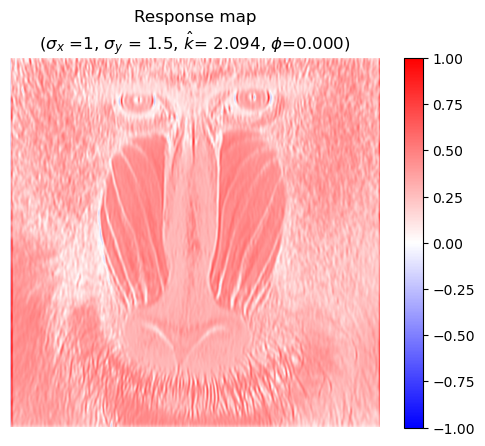

In [7]:
sigma_x,sigma_y,k_hat,phi = 1, 1.5, 2/3*pi, 0

M = get_kernel_V1(sigma_x,sigma_y,k_hat,phi, size=30)

from scipy.signal import convolve2d
Response_map = convolve2d(I_2d, M, mode='same')

# Normolized for plot
Response_map_normolized = Response_map / np.max(np.abs(Response_map))

plt.imshow(Response_map_normolized, cmap='bwr', vmax=1, vmin=-1)
plt.axis("off")
plt.colorbar()
plt.title(f"Response map\n($\sigma_x$ ={sigma_x}, $\sigma_y$ = {sigma_y}, $\hat k$= {k_hat:.3f}, $\phi$={phi:.3f})")
plt.savefig(os.path.join(figures_dir, f"V1_response_map_sx{sigma_x}sy{sigma_y}khat{k_hat:.3f}phi{phi:.3f}_baboon.pdf"), bbox_inches='tight', pad_inches=0.1)